# Quickstart

Take a small-scale nonlinear New Keynesian model with ZLB as a starting point, which is provided as an example [(find the yaml file here)](https://github.com/gboehl/econpizza/blob/master/econpizza/examples/nk.yml). Here is how to simulate it and plot nonlinear impulse responses. Start with some misc imports and load the package:

In [1]:
import matplotlib.pyplot as plt
import econpizza as ep

# only necessary if you run this in a jupyter notebook:
%matplotlib inline 

Next, load the model and solve for the steady state.

In [2]:
# the path to the example YAML 
example_nk = ep.examples.nk

# load the NK model
mod = ep.load(example_nk)
_ = mod.solve_stst()

(load:) Parsing done.
    Iteration   1 | max. error 7.89e-01 | lapsed 0.2448
    Iteration   2 | max. error 5.07e-01 | lapsed 0.2935
(solve_stst:) Steady state found (0.38772s). The solution converged.


Finally, set a 4% discount factor shock and simulate it:

In [3]:
# shock the discount factor by 4%
shk = ('e_beta', .04)

# find the nonlinear trajectory
x, flag = mod.find_path(shock=shk)

    Iteration   1 | max error 1.71e-01 | lapsed 0.4717s
    Iteration   2 | max error 3.89e-01 | lapsed 0.4734s
    Iteration   3 | max error 2.35e-01 | lapsed 0.4746s
    Iteration   4 | max error 2.50e-01 | lapsed 0.4758s
    Iteration   5 | max error 6.81e-02 | lapsed 0.4769s
    Iteration   6 | max error 2.14e-02 | lapsed 0.4779s
    Iteration   7 | max error 5.58e-06 | lapsed 0.4790s
    Iteration   8 | max error 3.98e-12 | lapsed 0.4802s
(find_path:) Stacking done (0.568s). The solution converged.


The rest is plotting...

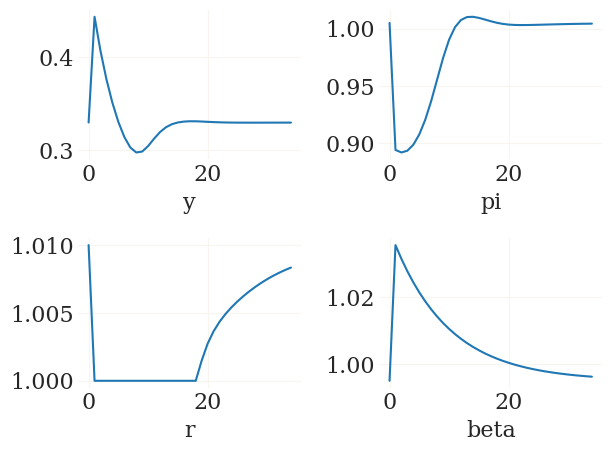

In [4]:
# plotting
fig, axs = plt.subplots(2,2)
for i,v in enumerate(('y', 'pi', 'r', 'beta')):

    axs.flatten()[i].plot(x[:35,mod.var_names.index(v)])
    axs.flatten()[i].set_xlabel(v)

fig.tight_layout()

The impulse responses are the usual dynamics of a nonlinear DSGE model with the zero-lower bound on nominal interest rates.

Alternatively to specifying a shock, you can instead provide the initial conditions:

    Iteration   1 | max error 1.51e-01 | lapsed 0.0016s
    Iteration   2 | max error 2.92e-01 | lapsed 0.0031s
    Iteration   3 | max error 1.57e-01 | lapsed 0.0042s
    Iteration   4 | max error 3.66e-02 | lapsed 0.0054s
    Iteration   5 | max error 3.93e-03 | lapsed 0.0065s
    Iteration   6 | max error 3.90e-05 | lapsed 0.0077s
    Iteration   7 | max error 5.68e-10 | lapsed 0.0088s
(find_path:) Stacking done (0.122s). The solution converged.


Text(0.5, 1.0, 'Nominal interest rate')

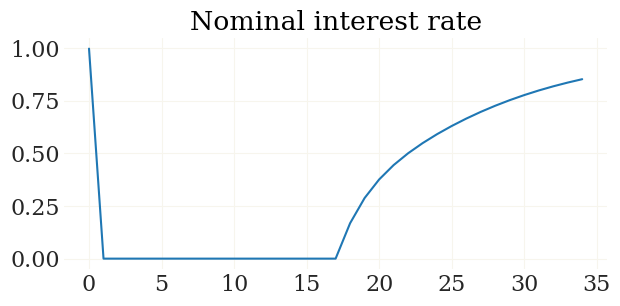

In [5]:
# use the jax implementation of numpy
import jax.numpy as jnp

# get the steady state as initial condion
x0 = mod['stst'].copy()
# and emulate again a 4% shock
x0['beta'] *= 1.04

# solving...
x, flag = mod.find_path(init_state=x0.values())

# plotting...
plt.figure(figsize=(7,3))
plt.plot(100*jnp.log(x[:35,mod.var_names.index('r')]))
plt.title('Nominal interest rate')